### Cats and Dogs Classification using CNN

In this workshop, I'm going to create CNN by my own.
We will use pytorch.

In [1]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import datasets
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader

In [2]:
torch.__version__

'2.2.0+cu118'

In [3]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

In [4]:
train_path = "../pytorch/CatDogDataset/train"
test_path = "../pytorch/CatDogDataset/test"
train_dataset = ImageFolder(root=train_path, transform=transform)
test_dataset = ImageFolder(root=test_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

In [5]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 557
    Root location: ../pytorch/CatDogDataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [6]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 140
    Root location: ../pytorch/CatDogDataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

### Craete Fully Connected Network

In [7]:
class CNN(nn.Module):
    def __init__(self, in_channel=3, num_classes=2):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=in_channel, out_channels=8, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.pool = nn.MaxPool2d(kernel_size=(3,3), stride=(1,1))
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.fc1 = nn.Linear(16*63504, num_classes)  # 128/2 = 64 -> 64/2 = 32        15376
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        
        return x

In [8]:
model = CNN()

### Set Device

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
device

device(type='cuda')

### Hyperparameters

In [13]:
learning_rate = 0.001 
batch_size = 8 
num_epochs = 15

### Initialize Network

In [14]:
model = CNN().to(device)

### Loss and Optimizer

In [15]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Train

In [16]:
for epoch in range(num_epochs):
    print("Epoch", epoch)
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to CUDA if possible
        data = data.to(device)
        targets = targets.to(device)
        
        # Score
        scores = model(data)
        loss = criterion(scores, targets)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient Descent or Adam Step
        optimizer.step() # Update Weight
        
        print(f"Loss : {loss}")

Epoch 0
Loss : 0.6845175623893738
Loss : 52.693397521972656
Loss : 8.920923233032227
Loss : 42.7801399230957
Loss : 51.41716766357422
Loss : 43.5009880065918
Loss : 11.012078285217285
Loss : 8.797002792358398
Loss : 17.828086853027344
Loss : 15.480184555053711
Loss : 10.20676040649414
Loss : 2.6989197731018066
Loss : 4.277064800262451
Loss : 2.1072378158569336
Loss : 7.247666358947754
Loss : 5.732582092285156
Loss : 1.3945344686508179
Loss : 2.1583428382873535
Loss : 3.806854724884033
Loss : 1.4344546794891357
Loss : 0.7396503686904907
Loss : 1.7763314247131348
Loss : 1.3518253564834595
Loss : 1.1267081499099731
Loss : 1.2233954668045044
Loss : 2.1622800827026367
Loss : 1.242370843887329
Loss : 0.7937329411506653
Loss : 1.0948233604431152
Loss : 0.9527230262756348
Loss : 0.6111358404159546
Loss : 0.9929095506668091
Loss : 0.7453941702842712
Loss : 1.1867115497589111
Loss : 0.8809903264045715
Epoch 1
Loss : 0.6431093215942383
Loss : 1.159908652305603
Loss : 0.8111428022384644
Loss : 0.9

In [17]:
train_dataset[2][0]

tensor([[[0.0706, 0.0706, 0.0706,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0706, 0.0706,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0706, 0.0706,  ..., 0.0627, 0.0627, 0.0627],
         ...,
         [0.1804, 0.1843, 0.1882,  ..., 0.0392, 0.0392, 0.0392],
         [0.1804, 0.1843, 0.1882,  ..., 0.0392, 0.0392, 0.0392],
         [0.1804, 0.1843, 0.1882,  ..., 0.0392, 0.0392, 0.0392]],

        [[0.0745, 0.0745, 0.0745,  ..., 0.0667, 0.0667, 0.0667],
         [0.0745, 0.0745, 0.0745,  ..., 0.0667, 0.0667, 0.0667],
         [0.0745, 0.0745, 0.0745,  ..., 0.0667, 0.0667, 0.0667],
         ...,
         [0.2000, 0.2000, 0.2039,  ..., 0.0392, 0.0392, 0.0392],
         [0.2000, 0.2000, 0.2039,  ..., 0.0392, 0.0392, 0.0392],
         [0.2000, 0.2000, 0.2039,  ..., 0.0392, 0.0392, 0.0392]],

        [[0.0941, 0.0941, 0.0941,  ..., 0.0863, 0.0863, 0.0863],
         [0.0941, 0.0941, 0.0941,  ..., 0.0863, 0.0863, 0.0863],
         [0.0941, 0.0941, 0.0941,  ..., 0.0863, 0.0863, 0.

In [18]:
train_dataset.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### Evaluation

In [19]:
def check_accuracy(loader, model):
    if train_loader:
        print("Checking accuracy on training data")
    else:
        print("Checking accuracy on test data")  
          
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            # x = x.reshape(x.shape[0], -1)
            
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
            
        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")
        
    model.train()

In [20]:
check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

Checking accuracy on training data
Got 557 / 557 with accuracy 100.00
Checking accuracy on training data
Got 80 / 140 with accuracy 57.14


Prediction : 1
Predicted :  Dog


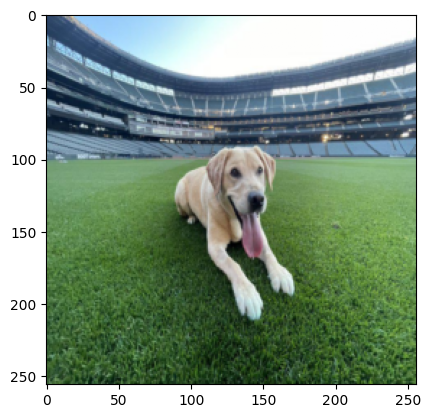

In [45]:
import matplotlib.pyplot as plt 

model.eval()

data, target = test_dataset[133]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction : {prediction}')

classes = ['Cat', 'Dog']
print("Predicted : ", classes[prediction])

image = data.squeeze(0).cpu().numpy().transpose(1, 2, 0)  # Transpose to (28, 28, 3)

plt.imshow(image, cmap='gray')
plt.show()


In [22]:
test_dataset[0]

(tensor([[[0.3647, 0.3882, 0.4235,  ..., 0.3020, 0.3176, 0.3255],
          [0.3490, 0.3765, 0.4157,  ..., 0.2980, 0.3098, 0.3176],
          [0.3412, 0.3647, 0.3922,  ..., 0.2941, 0.3059, 0.3137],
          ...,
          [0.3451, 0.3412, 0.3451,  ..., 0.2510, 0.2431, 0.2431],
          [0.2196, 0.2196, 0.2078,  ..., 0.2314, 0.2353, 0.2392],
          [0.1529, 0.1412, 0.1412,  ..., 0.2275, 0.2275, 0.2157]],
 
         [[0.5529, 0.5608, 0.5686,  ..., 0.5608, 0.5686, 0.5765],
          [0.5373, 0.5490, 0.5608,  ..., 0.5529, 0.5608, 0.5686],
          [0.5333, 0.5451, 0.5490,  ..., 0.5490, 0.5569, 0.5647],
          ...,
          [0.3176, 0.3176, 0.3176,  ..., 0.1882, 0.1843, 0.1843],
          [0.2157, 0.2157, 0.2118,  ..., 0.1725, 0.1765, 0.1804],
          [0.1608, 0.1529, 0.1490,  ..., 0.1686, 0.1686, 0.1569]],
 
         [[0.6118, 0.6196, 0.6275,  ..., 0.6039, 0.6157, 0.6235],
          [0.5961, 0.6078, 0.6196,  ..., 0.5961, 0.6078, 0.6157],
          [0.5922, 0.6039, 0.6078,  ...,

### Save Model

In [23]:
import pickle

filename = "catdogclassification.sav"
pickle.dump(model, open(filename, 'wb'))

### Load Model

In [24]:
import pickle

filename = "catdogclassification.sav"
loaded_model = pickle.load(open(filename, 'rb'))

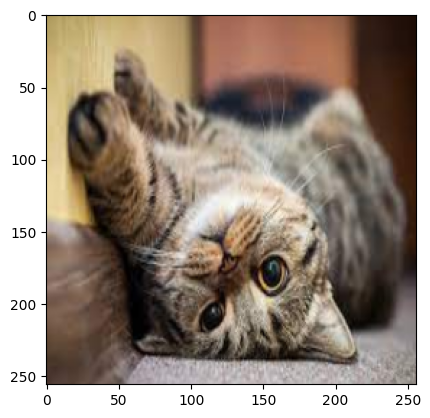

In [34]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

import torchvision
from PIL import Image

input_path = r"../pytorch/cat_test.jpg"
input_data = Image.open(input_path)  # Open image with PIL
# input_data = torchvision.io.read_image(path=input_path)
input_data = transform(input_data)
input_data = input_data.squeeze(0).cpu().numpy().transpose(1, 2, 0)  # Transpose to (28, 28, 3)

plt.imshow(input_data)
plt.show()

In [37]:
input_data = torch.tensor(input_data)
# expected 3 128 128
input_data = input_data.reshape(3,256,256)

In [38]:
print(input_data)
print(input_data.shape)

tensor([[[0.6706, 0.5922, 0.3529,  ..., 0.6196, 0.4196, 0.7176],
         [0.6157, 0.4157, 0.7098,  ..., 0.3059, 0.6118, 0.4000],
         [0.3020, 0.6118, 0.4000,  ..., 0.1098, 0.0510, 0.0235],
         ...,
         [0.3373, 0.2784, 0.3608,  ..., 0.6588, 0.7216, 0.7216],
         [0.6824, 0.7490, 0.7490,  ..., 0.2000, 0.0941, 0.0510],
         [0.8824, 0.8039, 0.5569,  ..., 0.4118, 0.3529, 0.4627]],

        [[0.3843, 0.3294, 0.4000,  ..., 0.6824, 0.7412, 0.7412],
         [0.7020, 0.7647, 0.7608,  ..., 0.2000, 0.0941, 0.0510],
         [0.8824, 0.8039, 0.5569,  ..., 0.4824, 0.4235, 0.5451],
         ...,
         [0.4980, 0.8314, 0.7373,  ..., 0.1176, 0.0667, 0.0431],
         [0.5569, 0.4588, 0.3804,  ..., 0.6039, 0.5529, 0.6392],
         [0.5765, 0.5255, 0.6314,  ..., 0.5569, 0.7294, 0.6353]],

        [[0.4980, 0.6706, 0.5765,  ..., 0.1059, 0.0627, 0.0431],
         [0.5569, 0.4627, 0.3882,  ..., 0.6314, 0.5843, 0.7137],
         [0.6549, 0.6078, 0.6941,  ..., 0.5961, 0.7647, 0.

In [ ]:
model.eval()

data = input_data.unsqueeze(0)

data = torch.tensor(data,dtype=torch.float)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction : {prediction}')

classes = ['Cat', 'Dog']
print("Predicted : ", classes[prediction])

In [ ]:
data = torch.tensor(data)
data

In [34]:
import os
import numpy as np
import json
import pandas as pd
import torch.nn.functional as F
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.backends.cudnn as cudnn
import random

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
np.random.seed(0)
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(0)

In [35]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
device

device(type='cuda')

In [36]:
device

device(type='cuda')